# 지하철 데이터 전처리

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
# 정은님의 지하철 데이터

In [3]:
from glob import glob

file_list = glob("../data/MiniP2/seoul_subway_year_concat/*.csv")
file_list.sort()
file_list

['../data/MiniP2/seoul_subway_year_concat/subway_2017.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2018.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2019.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2020.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2021.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2022.csv']

In [4]:
# 데이터를 합치자
dfs = []
for file_name in file_list:
    dfs.append(pd.read_csv(file_name))

In [5]:
df = pd.concat(dfs, ignore_index=True)
df

Unnamed: 0        사용일자       노선명        역명   승차총승객수   하차총승객수
0                 0  2017-01-01       2호선        봉천  11169.0  11198.0
1                 1  2017-01-01       2호선        신림  40137.0  42005.0
2                 2  2017-01-01       2호선       신대방  16033.0  16054.0
3                 3  2017-01-01       2호선   구로디지털단지  28246.0  28497.0
4                 4  2017-01-01       2호선  대림(구로구청)  20946.0  21926.0
...             ...         ...       ...       ...      ...      ...
1237080       18177  2022-09-30       경춘선        춘천   2505.0   1722.0
1237081       18178  2022-09-30  공항철도 1호선       서울역  12725.0  11573.0
1237082       18179  2022-09-30  공항철도 1호선        공덕   2803.0   3699.0
1237083       18180  2022-09-30  공항철도 1호선      홍대입구  12609.0  13478.0
1237084       18181  2022-09-30  공항철도 1호선  디지털미디어시티  15906.0  14510.0

[1237085 rows x 6 columns]

In [6]:
# 필요없는 열 제거 
df = df.drop(columns="Unnamed: 0")
df.head()

사용일자  노선명        역명   승차총승객수   하차총승객수
0  2017-01-01  2호선        봉천  11169.0  11198.0
1  2017-01-01  2호선        신림  40137.0  42005.0
2  2017-01-01  2호선       신대방  16033.0  16054.0
3  2017-01-01  2호선   구로디지털단지  28246.0  28497.0
4  2017-01-01  2호선  대림(구로구청)  20946.0  21926.0

In [7]:
# 연도와 월을 추출하기 위해 데이터 타입 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237085 entries, 0 to 1237084
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   사용일자    1237085 non-null  object 
 1   노선명     1237085 non-null  object 
 2   역명      1237085 non-null  object 
 3   승차총승객수  1237085 non-null  float64
 4   하차총승객수  1237085 non-null  float64
dtypes: float64(2), object(3)
memory usage: 47.2+ MB


In [8]:
df["사용일자"] = pd.to_datetime(df["사용일자"])

In [9]:
# 잘 바뀜
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237085 entries, 0 to 1237084
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   사용일자    1237085 non-null  datetime64[ns]
 1   노선명     1237085 non-null  object        
 2   역명      1237085 non-null  object        
 3   승차총승객수  1237085 non-null  float64       
 4   하차총승객수  1237085 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 47.2+ MB


In [10]:
# 연도, 월 추출
df["연"] = df["사용일자"].dt.year
df["월"] = df["사용일자"].dt.month
df["연월"] = df["사용일자"].dt.strftime("%y-%m")
df

사용일자       노선명        역명   승차총승객수   하차총승객수     연  월     연월
0       2017-01-01       2호선        봉천  11169.0  11198.0  2017  1  17-01
1       2017-01-01       2호선        신림  40137.0  42005.0  2017  1  17-01
2       2017-01-01       2호선       신대방  16033.0  16054.0  2017  1  17-01
3       2017-01-01       2호선   구로디지털단지  28246.0  28497.0  2017  1  17-01
4       2017-01-01       2호선  대림(구로구청)  20946.0  21926.0  2017  1  17-01
...            ...       ...       ...      ...      ...   ... ..    ...
1237080 2022-09-30       경춘선        춘천   2505.0   1722.0  2022  9  22-09
1237081 2022-09-30  공항철도 1호선       서울역  12725.0  11573.0  2022  9  22-09
1237082 2022-09-30  공항철도 1호선        공덕   2803.0   3699.0  2022  9  22-09
1237083 2022-09-30  공항철도 1호선      홍대입구  12609.0  13478.0  2022  9  22-09
1237084 2022-09-30  공항철도 1호선  디지털미디어시티  15906.0  14510.0  2022  9  22-09

[1237085 rows x 8 columns]

In [11]:
# 총 이용객 계산
df["총이용객"] = df["승차총승객수"] + df["하차총승객수"]
df.head()

사용일자  노선명        역명   승차총승객수   하차총승객수     연  월     연월     총이용객
0 2017-01-01  2호선        봉천  11169.0  11198.0  2017  1  17-01  22367.0
1 2017-01-01  2호선        신림  40137.0  42005.0  2017  1  17-01  82142.0
2 2017-01-01  2호선       신대방  16033.0  16054.0  2017  1  17-01  32087.0
3 2017-01-01  2호선   구로디지털단지  28246.0  28497.0  2017  1  17-01  56743.0
4 2017-01-01  2호선  대림(구로구청)  20946.0  21926.0  2017  1  17-01  42872.0

In [35]:
# 컬럼 재배치
df = df[['사용일자', '연월', '연', '월', '노선명', '역명', '승차총승객수', '하차총승객수', '총이용객']]
df.sample(10)

사용일자     연월     연   월       노선명        역명   승차총승객수   하차총승객수  \
417950  2018-12-26  18-12  2018  12       7호선       보라매  11362.0  11278.0   
311942  2018-06-28  18-06  2018   6       4호선   동작(현충원)   2570.0   2634.0   
286062  2018-05-14  18-05  2018   5       경부선        군포   8917.0   8815.0   
35757   2017-03-05  17-03  2017   3       경부선       오산대   2026.0   2139.0   
938465  2021-05-22  21-05  2021   5  공항철도 1호선  인천공항1터미널   2961.0   3196.0   
27724   2017-02-19  17-02  2017   2       중앙선        아신    656.0    611.0   
179832  2017-11-13  17-11  2017  11       경원선        한남   5053.0   5004.0   
810341  2020-10-20  20-10  2020  10       분당선        보정   2663.0   2246.0   
1091617 2022-01-31  22-01  2022   1     우이신설선        정릉   1714.0   1446.0   
1031759 2021-10-24  21-10  2021  10       2호선      상왕십리   6572.0   6550.0   

            총이용객  
417950   22640.0  
311942    5204.0  
286062   17732.0  
35757     4165.0  
938465    6157.0  
27724     1267.0  
179832   10057.0  
810341    4909.0  
1091617   3160.0  
1031759  13122.0

# 시각화

In [13]:
# 같은 노선에 있는 역 이름 조회
def list_stations(line_name):
    return df[df["노선명"] == line_name]['역명'].unique()

In [48]:
# 평균 이용객 그래프 그려주는 함수
def avg_passenger(line_name, station_name):
    # 입력 받은 노선 & 역이름 df 추출
    df_temp = df[(df["노선명"] == line_name) & (df["역명"] == station_name)]
    
    # 기간별 그룹화, 총 이용객의 평균 그래프 반환
    return df_temp.groupby(["연월"])[["총이용객", "승차총승객수", "하차총승객수"]].mean().plot()

In [49]:
list_stations("2호선")

array(['봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림', '문래', '영등포구청',
       '용두(동대문구청)', '신정네거리', '양천구청', '도림천', '신설동', '신답', '용답',
       '충정로(경기대입구)', '아현', '이대', '신촌', '홍대입구', '합정', '당산', '건대입구',
       '구의(광진구청)', '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장',
       '삼성(무역센터)', '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당',
       '낙성대', '시청', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원', '신당', '상왕십리',
       '왕십리(성동구청)', '한양대', '뚝섬', '성수', '서울대입구(관악구청)', '동대문역사문화공원(DDP)',
       '낙성대(강감찬)'], dtype=object)

<AxesSubplot:xlabel='연월'>

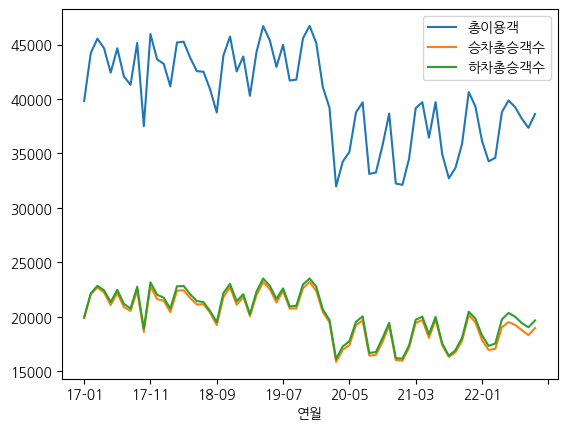

In [50]:
avg_passenger("2호선", "영등포구청")

# 노선별 이용객 순위

In [17]:
# 연도, 월 단위 호선별, 지하철역 평균 이용객 수
dfg = df.groupby(["노선명", "역명"])[["총이용객"]].mean()
dfg

총이용객
노선명 역명               
1호선 동대문  26300.414960
    동묘앞  19347.918056
    서울역  90571.956646
    시청   42890.475941
    신설동  27361.956170
...               ...
중앙선 원덕     785.449738
    중랑   10512.376846
    지평     110.995671
    팔당    2007.733683
    회기   49799.397808

[643 rows x 1 columns]

In [21]:
# 22년도 2호선 데이터프레임
df22 = df[(df["연"] == 2022) & (df["노선명"] == "3호선")]
df22.head()

사용일자     연월     연  월  노선명   역명  승차총승객수  하차총승객수     총이용객
1073109 2022-01-01  22-01  2022  1  3호선   수서  7370.0  7076.0  14446.0
1073110 2022-01-01  22-01  2022  1  3호선  학여울   461.0   473.0    934.0
1073111 2022-01-01  22-01  2022  1  3호선   대청  3224.0  2903.0   6127.0
1073112 2022-01-01  22-01  2022  1  3호선   일원  3321.0  2803.0   6124.0
1073664 2022-01-01  22-01  2022  1  3호선   지축  1580.0  1532.0   3112.0

In [37]:
pivot_test = df22.pivot_table(index="역명", columns='연월', values="총이용객")
pivot_test

연월                   22-01         22-02         22-03         22-04  \
역명                                                                     
가락시장          14544.000000  13102.821429  13526.322581  15625.633333   
경복궁(정부서울청사)   31370.451613  30002.214286  32207.612903  40934.766667   
경찰병원          11659.677419  10853.321429  10877.548387  12308.566667   
고속터미널         75109.774194  69138.535714  65699.677419  81355.133333   
교대(법원.검찰청)    17677.903226  16439.214286  17091.677419  20101.700000   
구파발           32892.322581  31066.821429  31921.193548  36510.700000   
금호            12823.322581  12062.857143  12038.258065  13776.433333   
남부터미널(예술의전당)  47880.000000  44966.500000  44359.967742  51669.700000   
녹번            23735.548387  22323.785714  23141.451613  26230.566667   
대청            15296.677419  14528.142857  14829.451613  16943.200000   
대치            19436.741935  17937.392857  17567.096774  19259.400000   
도곡             8439.612903   7916.178571   8090.516129   9539.433333   
독립문           11275.645161  11087.428571  11640.645161  13687.400000   
동대입구          12625.129032  12428.285714  14329.419355  17755.400000   
매봉            19043.516129  17587.392857  17507.935484  20621.166667   
무악재            6328.548387   6013.571429   6102.580645   7112.833333   
불광            27924.129032  26670.071429  27096.967742  30776.433333   
수서            28471.935484  26788.750000  26859.645161  31540.366667   
신사            53996.451613  50271.678571  49197.645161  55697.033333   
안국            32446.580645  30086.321429  31742.903226  40945.233333   
압구정           55633.096774  51583.357143  49891.870968  56897.300000   
약수            20482.000000  19460.178571  19993.903226  23084.966667   
양재(서초구청)      62728.612903  58021.357143  58669.258065  67630.500000   
연신내           59079.677419  56364.035714  57687.741935  65097.166667   
오금             9384.806452   8852.000000   9006.806452  10516.033333   
옥수            14856.967742  13869.142857  14039.387097  16602.766667   
을지로3가         16179.096774  14800.642857  14971.354839  17725.766667   
일원            15265.806452  14463.678571  14953.032258  17132.500000   
잠원             7574.258065   7085.500000   7299.677419   8645.166667   
종로3가          17229.709677  16461.428571  16430.064516  18740.166667   
지축             7043.967742   6695.000000   7240.064516   8634.266667   
충무로               1.055556      1.437500      1.833333      1.652174   
학여울            3061.419355   3494.321429   4057.838710   4195.533333   
홍제            27325.193548  26323.250000  27370.612903  31436.100000   

연월                   22-05         22-06         22-07         22-08  \
역명                                                                     
가락시장          16402.580645  16174.266667  15660.387097  15313.838710   
경복궁(정부서울청사)   55263.419355  49738.633333  40334.483871  38221.483871   
경찰병원          12864.161290  12883.200000  12688.193548  12484.580645   
고속터미널         93538.677419  89969.900000  91318.709677  86629.967742   
교대(법원.검찰청)    21424.935484  21010.033333  20453.677419  19790.258065   
구파발           39855.129032  38810.966667  38850.290323  36910.290323   
금호            14384.677419  14237.866667  13766.096774  13380.516129   
남부터미널(예술의전당)  55587.967742  54420.466667  54238.322581  52084.419355   
녹번            27548.806452  26984.966667  26118.451613  25176.935484   
대청            17856.258065  17946.500000  17210.645161  16959.709677   
대치            20903.451613  20771.666667  21467.483871  21188.580645   
도곡            10008.774194   9760.100000   9230.354839   8830.741935   
독립문           14943.870968  14005.733333  13131.612903  12857.064516   
동대입구          18306.870968  17388.400000  15984.967742  15874.064516   
매봉            21634.258065  21606.466667  21181.612903  20278.516129   
무악재            7499.290323   7315.300000   7066.064516   6794.451613   
불광            32883.161290  31838.633333  30968.322581  29653.129032   
수서            33574.161290  33282.73333

<AxesSubplot:xlabel='연월', ylabel='역명'>

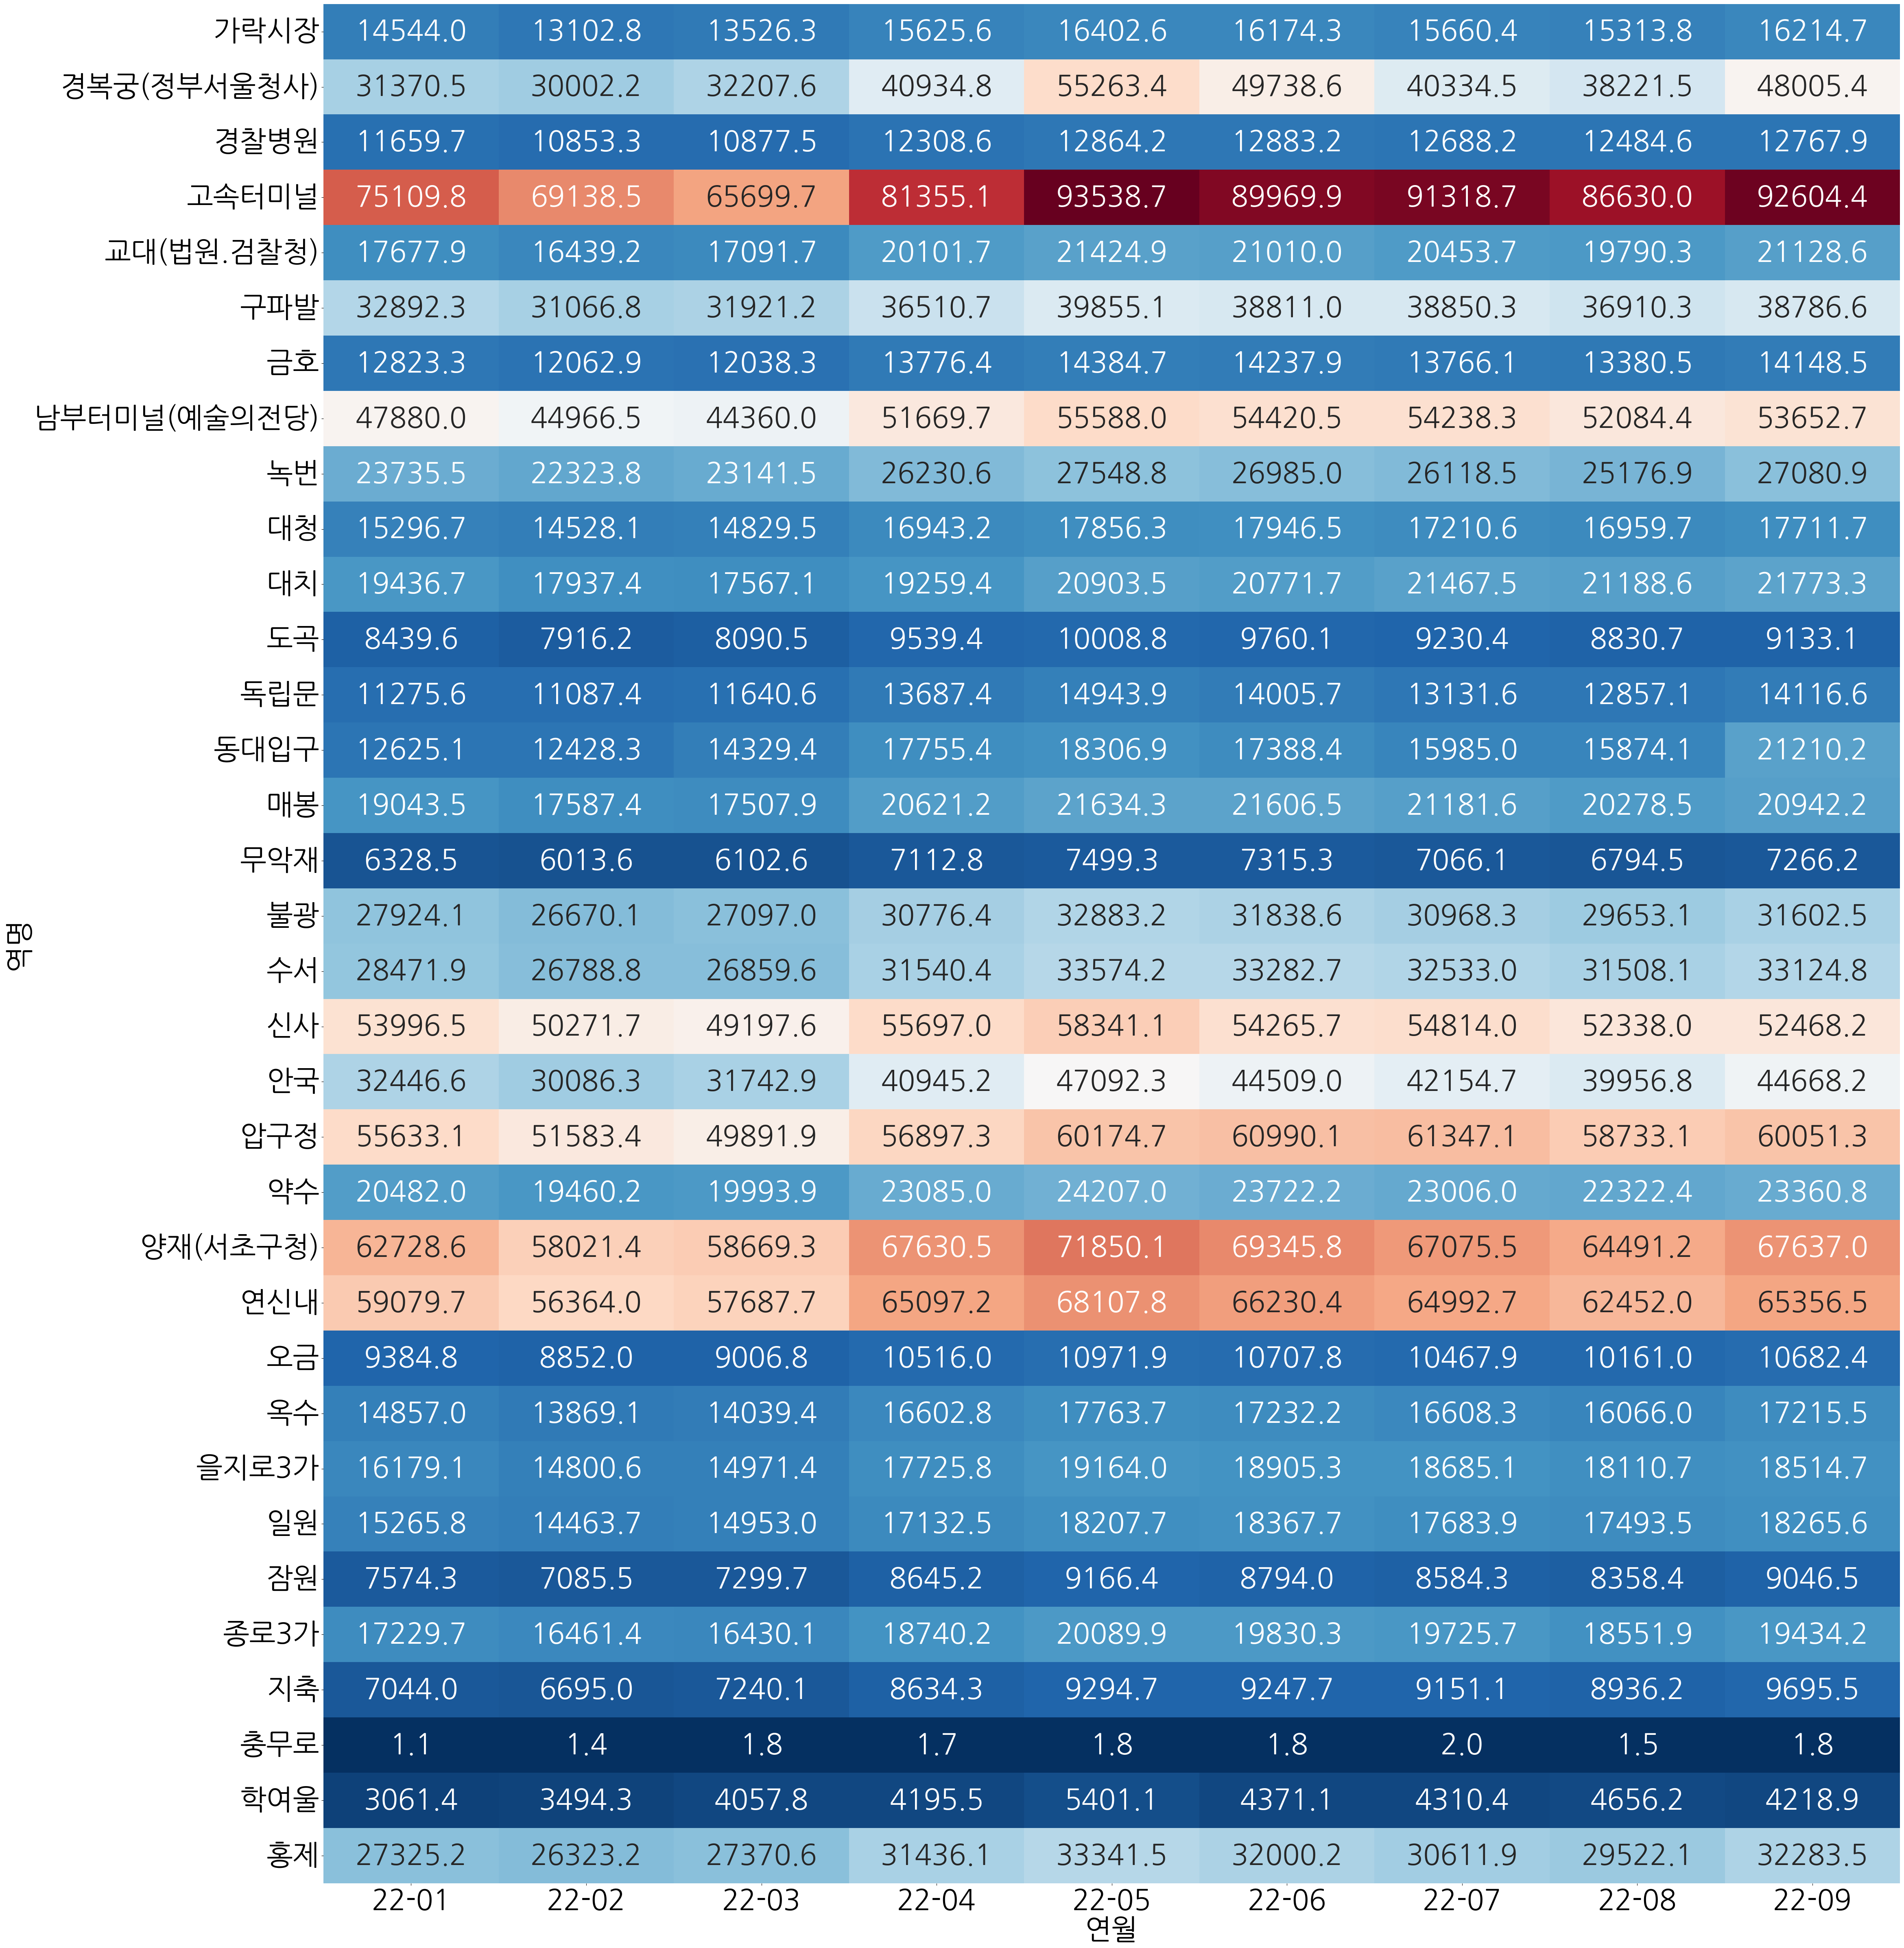

In [67]:
plt.figure(figsize=(50, 60))
plt.xlabel('노선명', fontdict={'size':50});
plt.ylabel('연월' ,fontdict={'size':50});
plt.rc('xtick', labelsize=50)
plt.rc('ytick', labelsize=50)
sns.heatmap(pivot_test, cbar=False, cmap="RdBu_r", 
            annot=True, annot_kws={"size": 50}, fmt=".1f")

In [70]:
# 함수 버전
def hot_station_of_year(line_name, year):
    # 입력받은 노선과 연도에 맞는 데이터 프레임 생성
    df_temp = df[(df["연"] == year) & (df["노선명"] == line_name)]
    
    # 만들어진 데이터 프레임으로 월별, 역별 총 이용객의 평균 피봇 테이블 
    pivot_temp = df_temp.pivot_table(index="역명", 
                                  columns='연월', values="총이용객")
    
    # 히트맵 시각화
    plt.figure(figsize=(50, 60))
    plt.xlabel('노선명', fontdict={'size':50});
    plt.ylabel('연월' ,fontdict={'size':50});
    plt.rc('xtick', labelsize=50)
    plt.rc('ytick', labelsize=50)
    return sns.heatmap(pivot_temp, cbar=False, cmap="RdBu_r", 
                annot=True, annot_kws={"size": 50}, fmt=".1f") 

<AxesSubplot:xlabel='연월', ylabel='역명'>

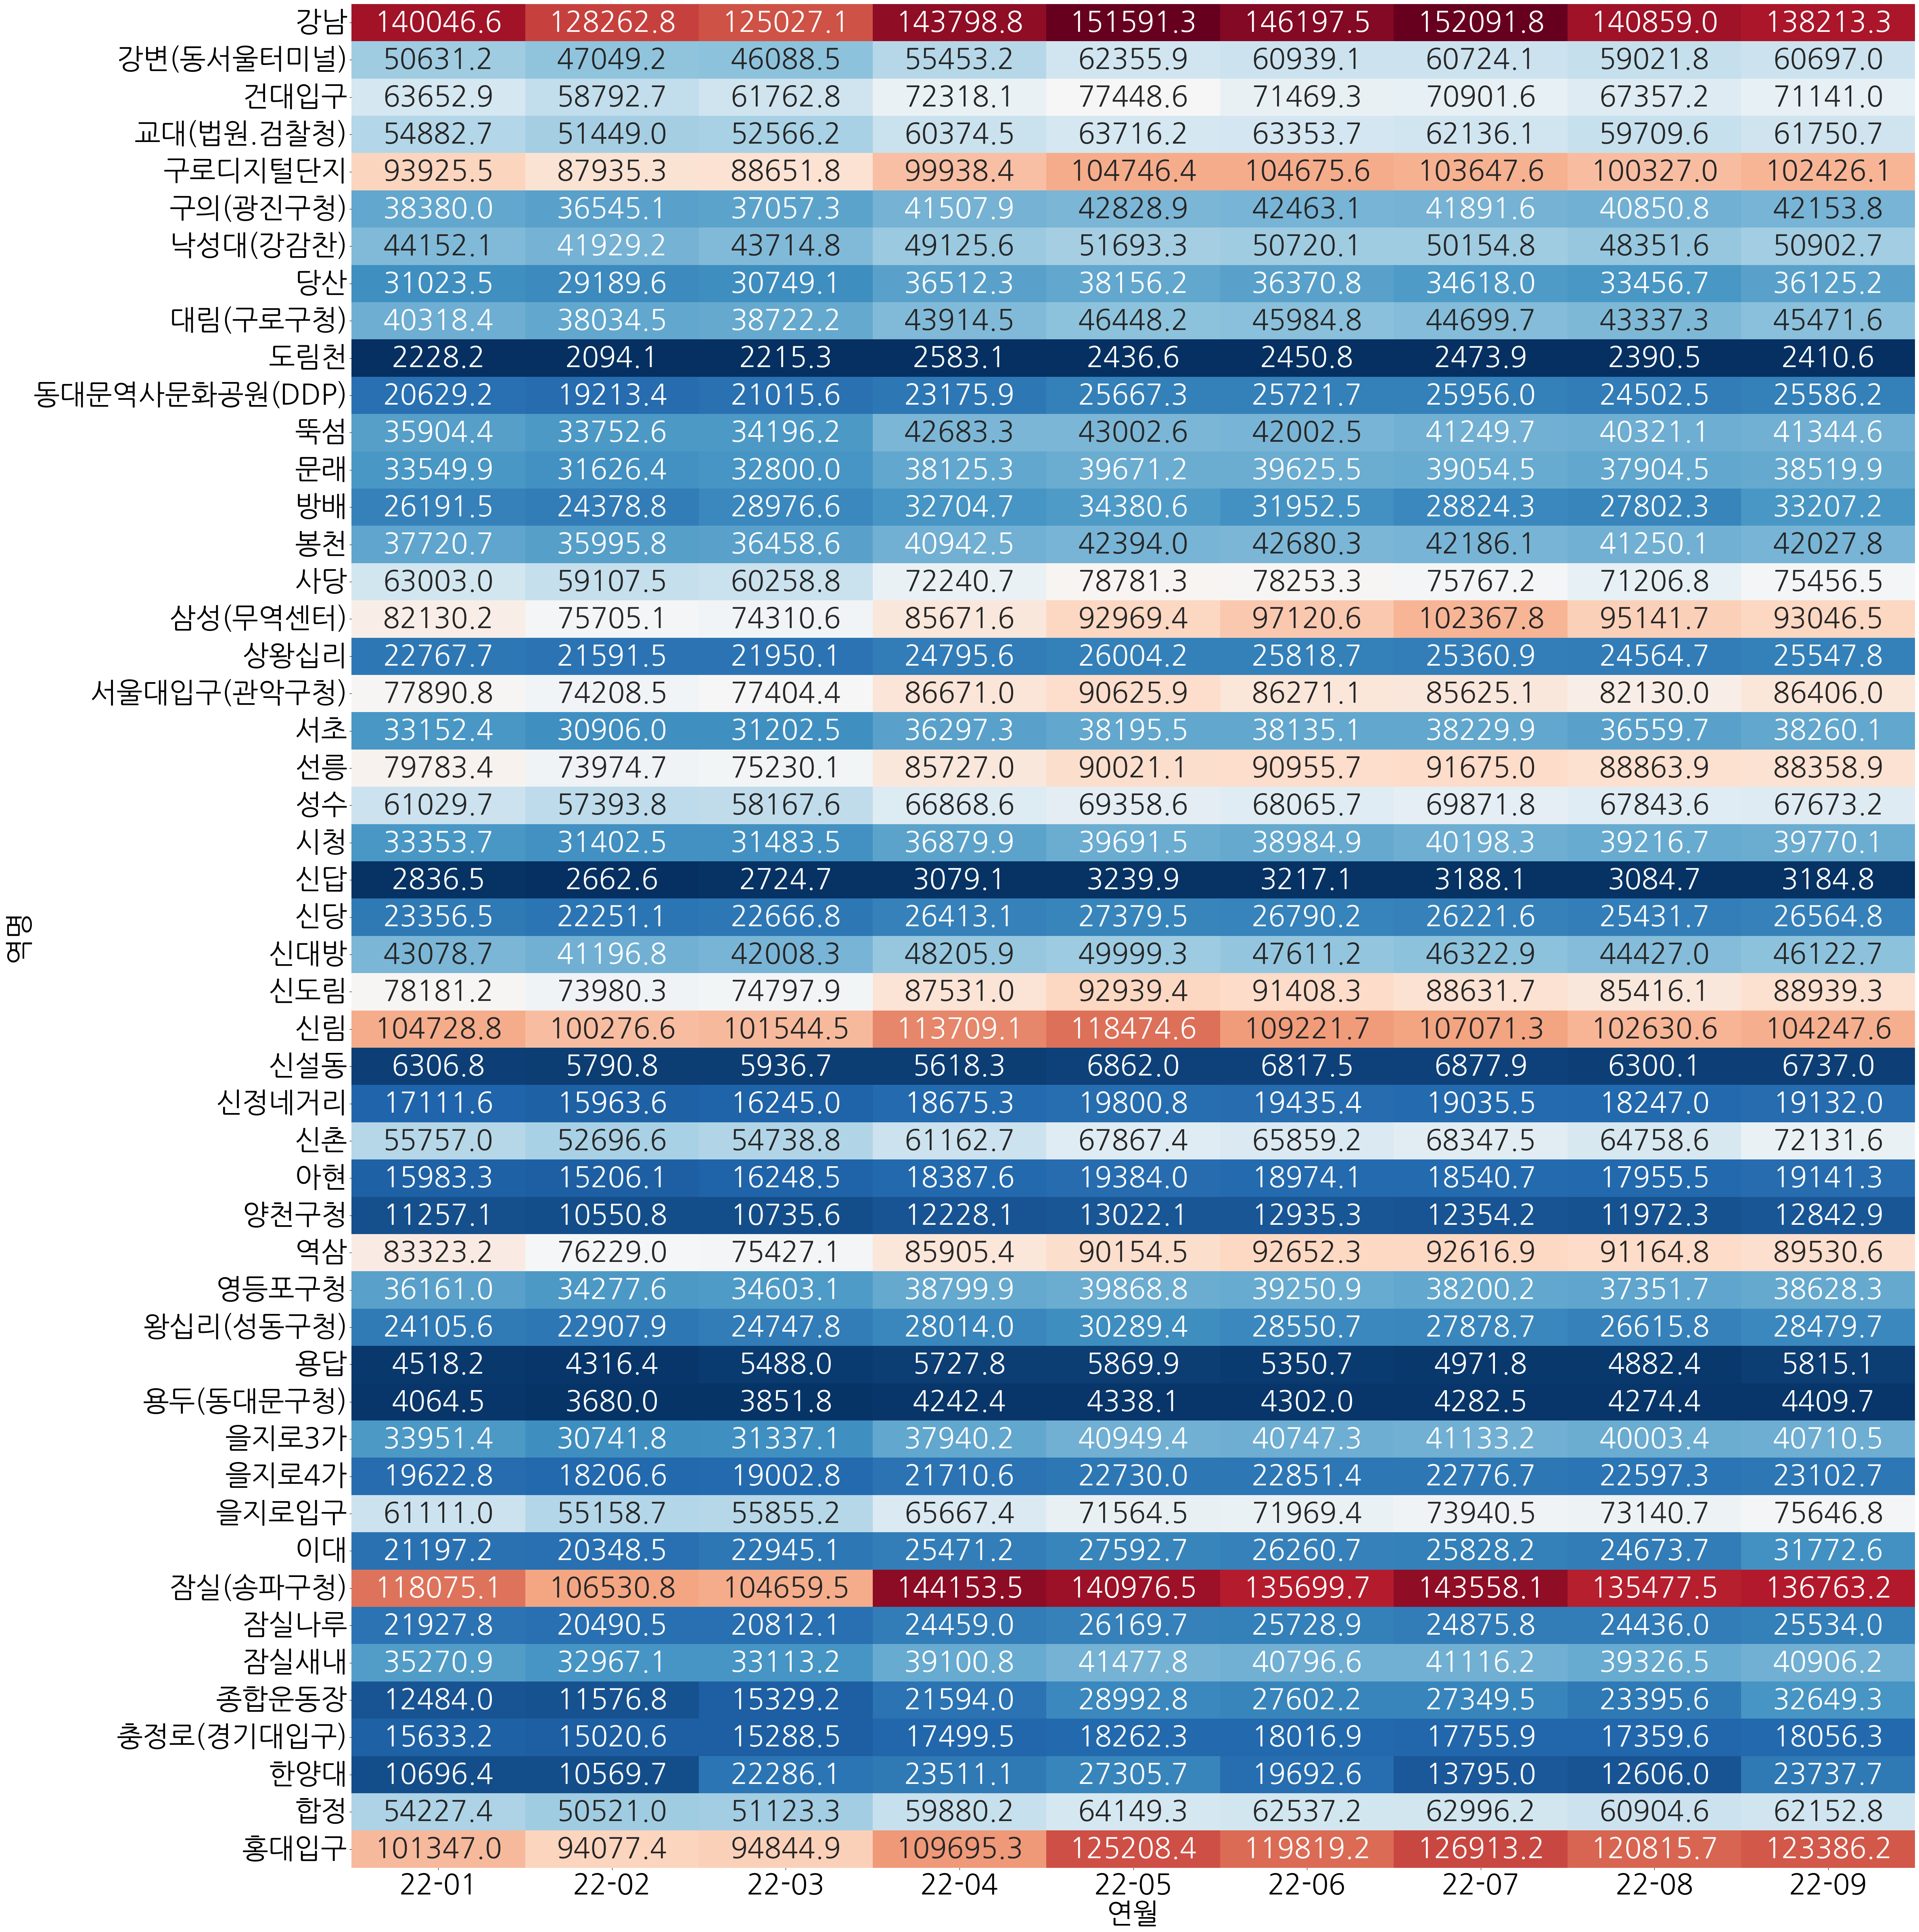

In [71]:
# 2022년 2호선
hot_station_of_year("2호선", 2022)

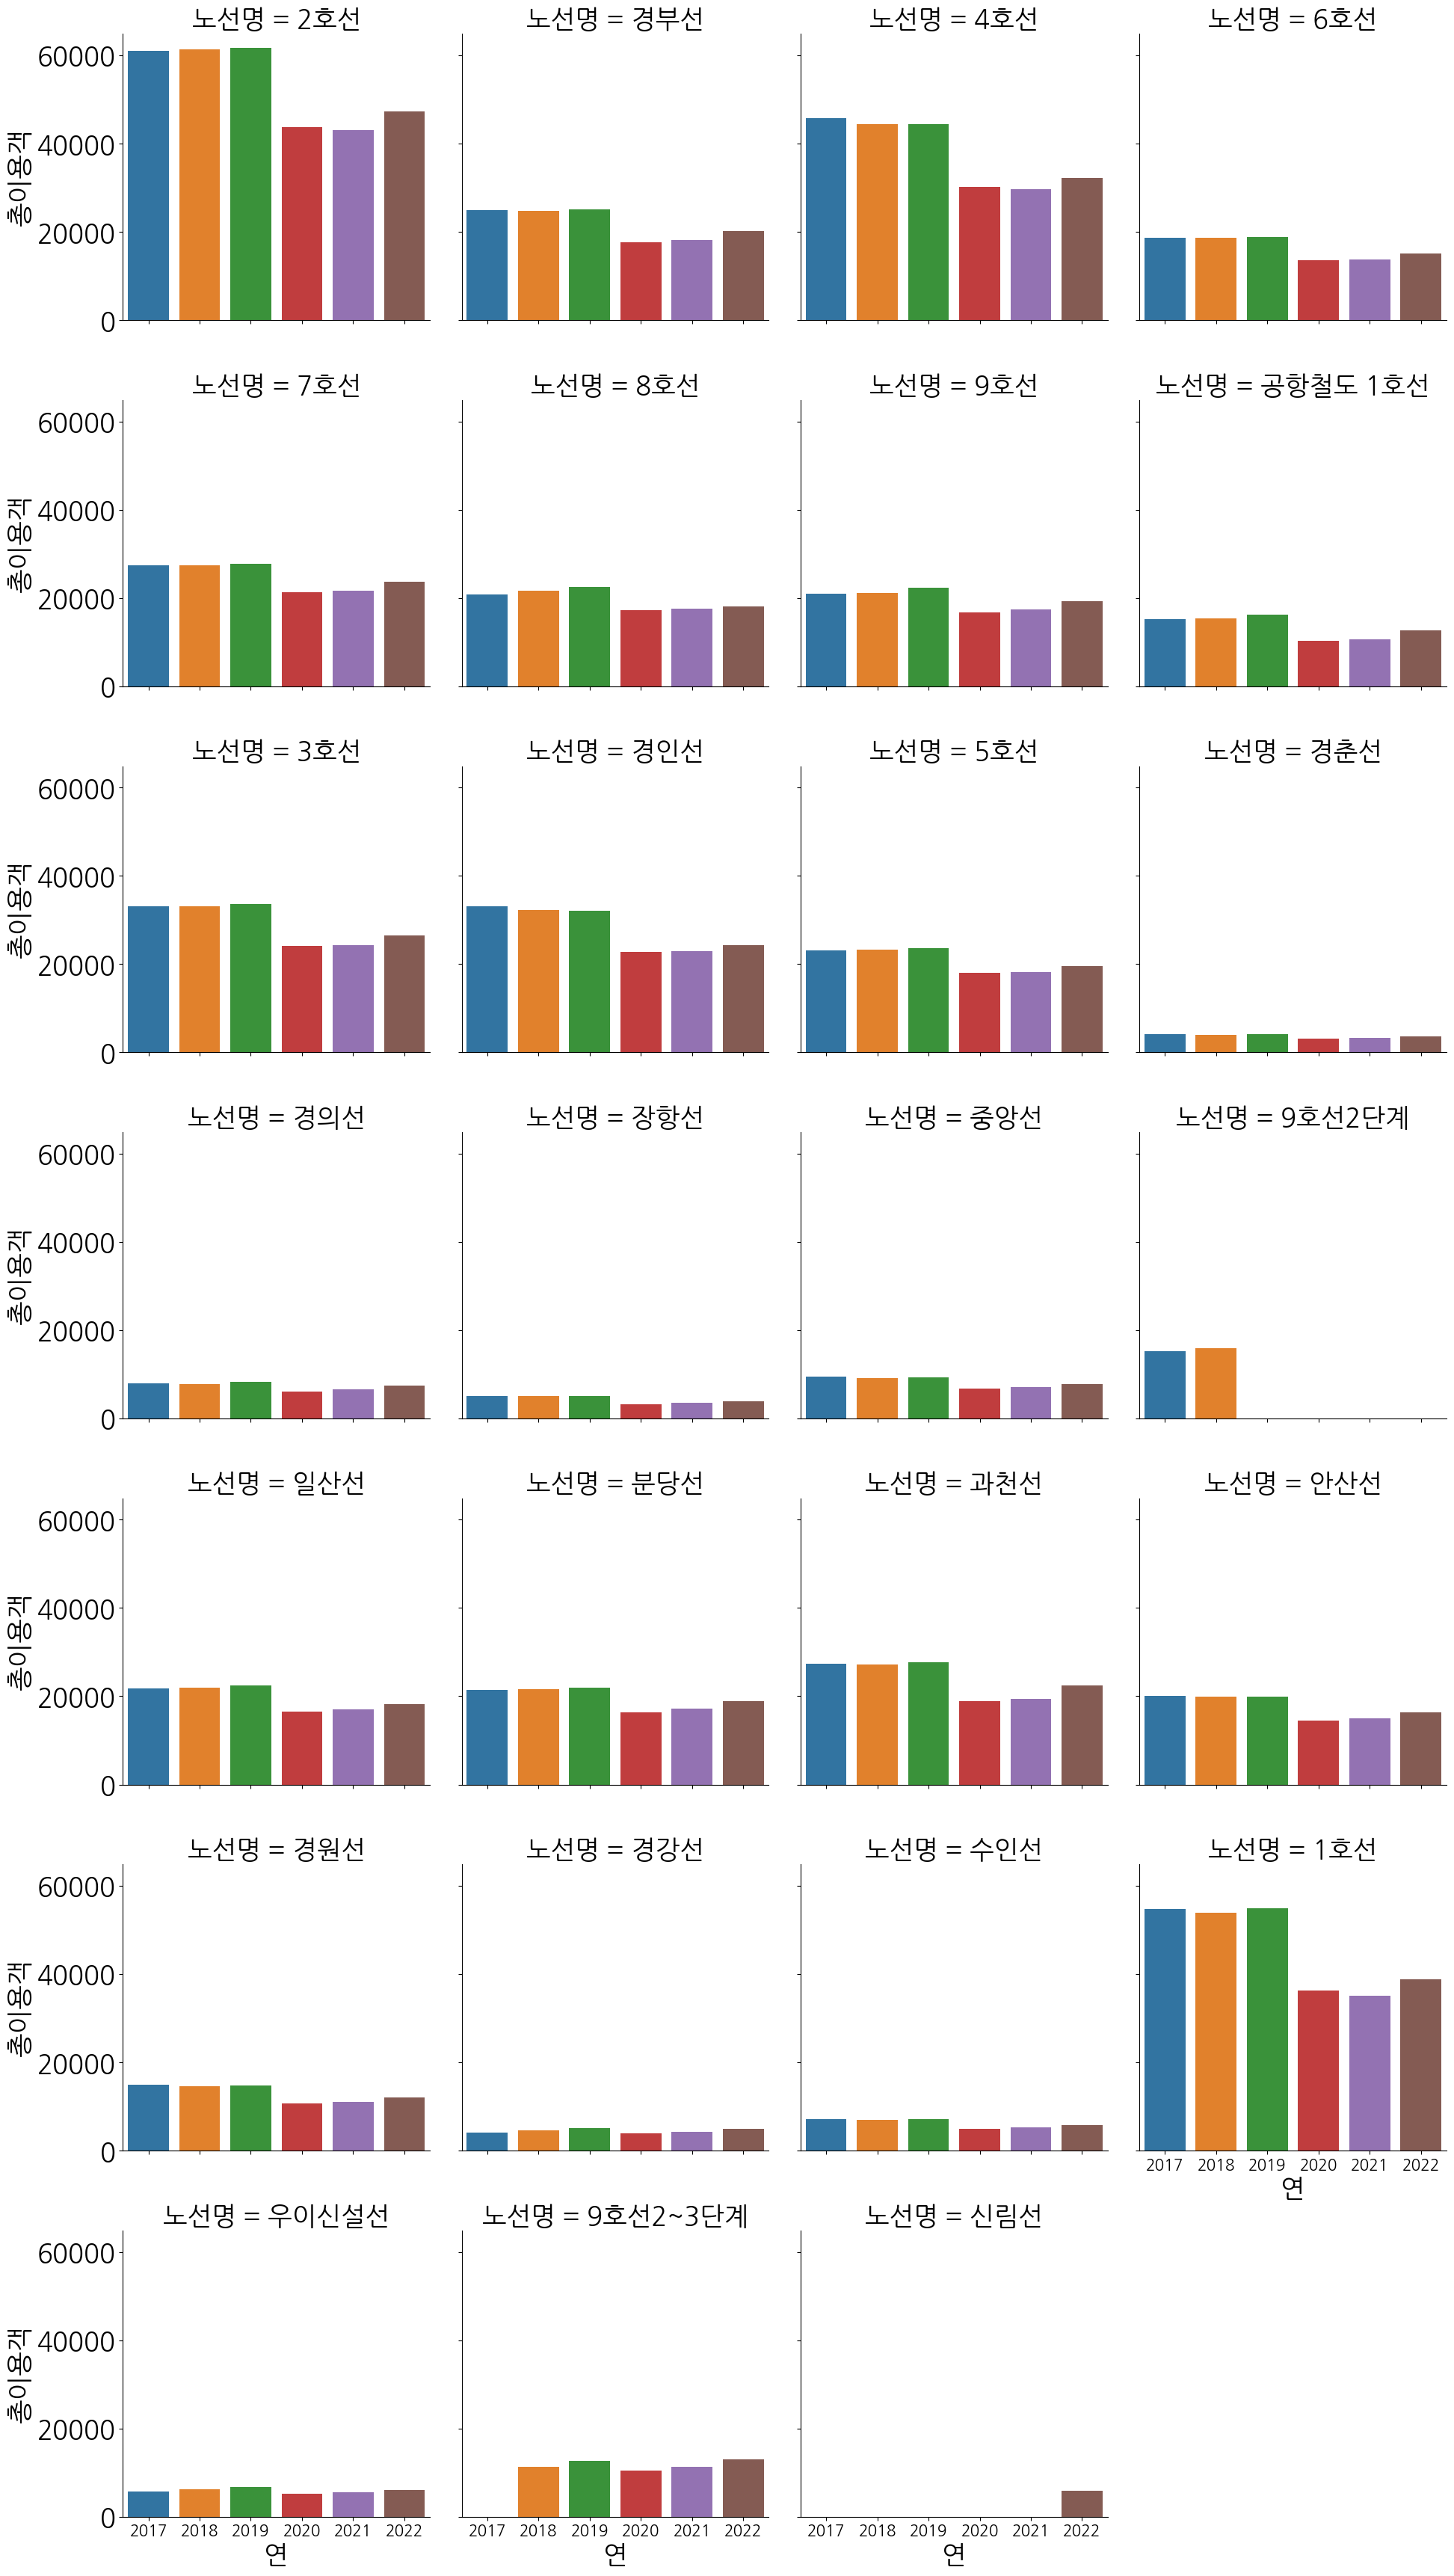

In [85]:
# 최근 5년간 노선별 이용객 추이
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=25)
plt.rc('font', size=25)
sns.catplot(data=df, kind='bar', x="연", y='총이용객', 
            col='노선명', errorbar=None, col_wrap=4)